<a href="https://colab.research.google.com/github/ajaymathew522/TheSparksFoundationInternship/blob/master/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [2]:
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


We can see that there are 9994 records of sale and 13 columns

In [3]:
data.shape

(9994, 13)

There are no columns where data is null

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Getting a grasp about the number variables in the data.

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#Let us First Analyse the different catgories and other factors without considering the geographical location


<h3>First let's do some work on all types of sales, irrespective of profit or loss.

Finding out the total profit and the average profit per sale by each Sub-Category. This shows that Tables, Bookcases and Supplies had a negative profit.

In [6]:
data.groupby(['Category','Sub-Category'])['Profit'].sum()

Category         Sub-Category
Furniture        Bookcases       -3472.5560
                 Chairs          26590.1663
                 Furnishings     13059.1436
                 Tables         -17725.4811
Office Supplies  Appliances      18138.0054
                 Art              6527.7870
                 Binders         30221.7633
                 Envelopes        6964.1767
                 Fasteners         949.5182
                 Labels           5546.2540
                 Paper           34053.5693
                 Storage         21278.8264
                 Supplies        -1189.0995
Technology       Accessories     41936.6357
                 Copiers         55617.8249
                 Machines         3384.7569
                 Phones          44515.7306
Name: Profit, dtype: float64

In [7]:
data.groupby(['Category','Sub-Category'])['Profit'].mean()

Category         Sub-Category
Furniture        Bookcases       -15.230509
                 Chairs           43.095894
                 Furnishings      13.645918
                 Tables          -55.565771
Office Supplies  Appliances       38.922758
                 Art               8.200737
                 Binders          19.843574
                 Envelopes        27.418019
                 Fasteners         4.375660
                 Labels           15.236962
                 Paper            24.856620
                 Storage          25.152277
                 Supplies         -6.258418
Technology       Accessories      54.111788
                 Copiers         817.909190
                 Machines         29.432669
                 Phones           50.073938
Name: Profit, dtype: float64

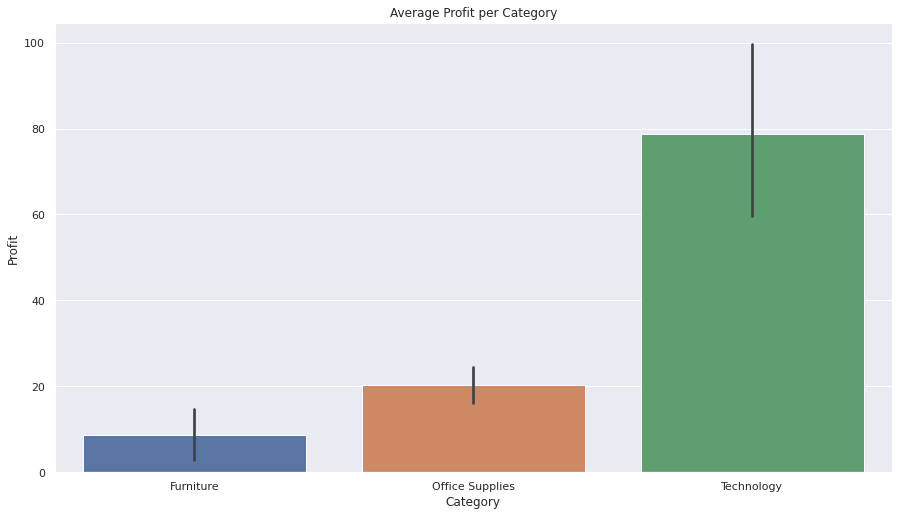

In [8]:
sns.set_style('white')
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(x='Category', y='Profit', data=data)
plt.title('Average Profit per Category')
plt.show()

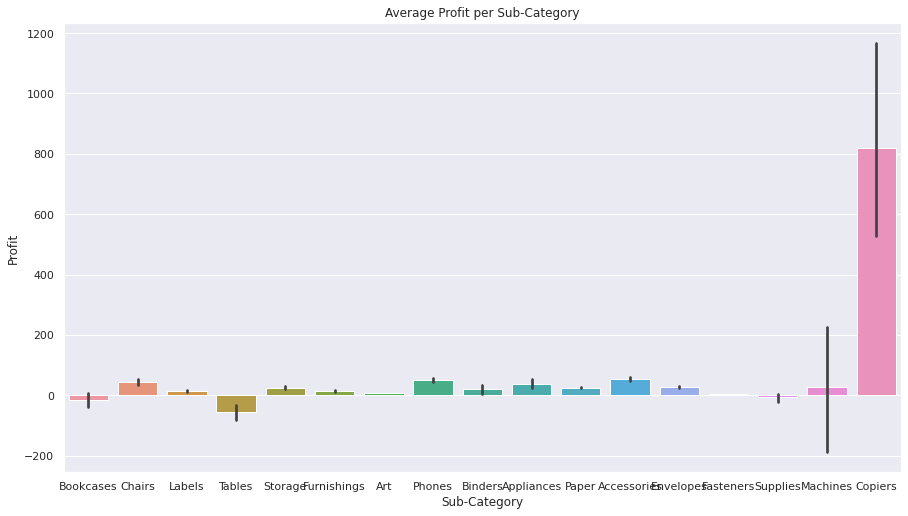

In [9]:
sns.barplot(x='Sub-Category', y='Profit', data=data)
plt.title('Average Profit per Sub-Category')
plt.show()

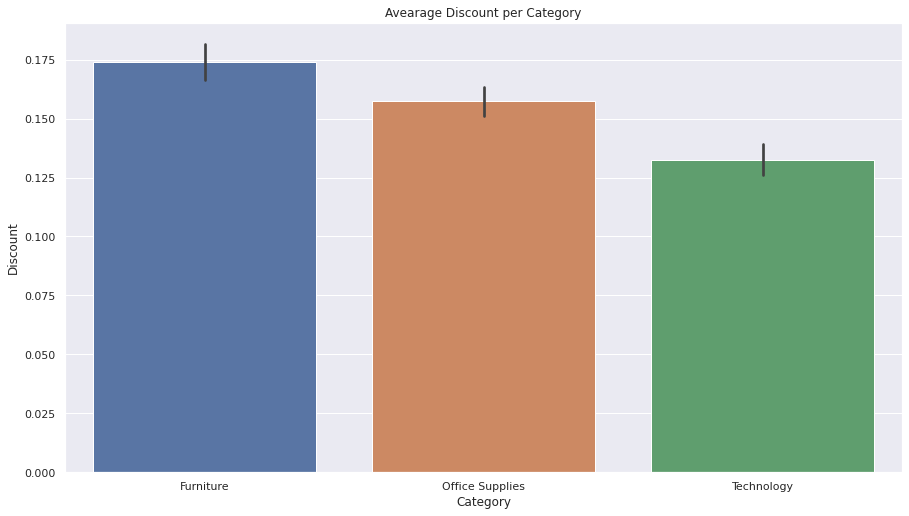

In [10]:
sns.barplot(x='Category', y='Discount', data=data)
plt.title('Avearage Discount per Category')
plt.show()

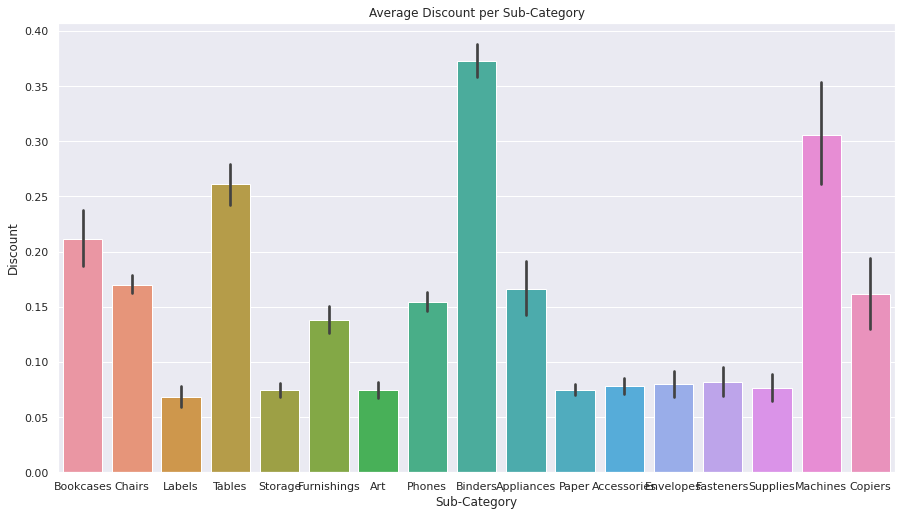

In [11]:
sns.barplot(x='Sub-Category', y='Discount', data=data)
plt.title('Average Discount per Sub-Category')
plt.show()

<h3>Now, let's analyze only the data of sales that resulted in a loss.

Creating a DataFrame where the profit of a sale fell in the negative or no profit. We can see that 1936 products were sold at a loss. That is 1936 of the total 9994 sales recorded, i.e, nearly 20% of all sales occured at a loss.

In [12]:
data_loss = data[data['Profit']<=0]
data_loss.shape

(1936, 13)

In [13]:
data_loss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


Almost all products that we sold at loss had discounts on them.

In [14]:
data_loss[data_loss['Discount'] >0].shape

(1906, 13)

Consumer segment accounted for more than 50% of the loss occured.

In [15]:
data_loss['Segment'].value_counts()

Consumer       1038
Corporate       573
Home Office     325
Name: Segment, dtype: int64

Analyzing the shipping method chose thorughtout each segment.

In [16]:
data_loss.groupby('Segment')['Ship Mode'].value_counts()

Segment      Ship Mode     
Consumer     Standard Class    651
             Second Class      178
             First Class       149
             Same Day           60
Corporate    Standard Class    365
             Second Class       96
             First Class        91
             Same Day           21
Home Office  Standard Class    203
             First Class        63
             Second Class       41
             Same Day           18
Name: Ship Mode, dtype: int64

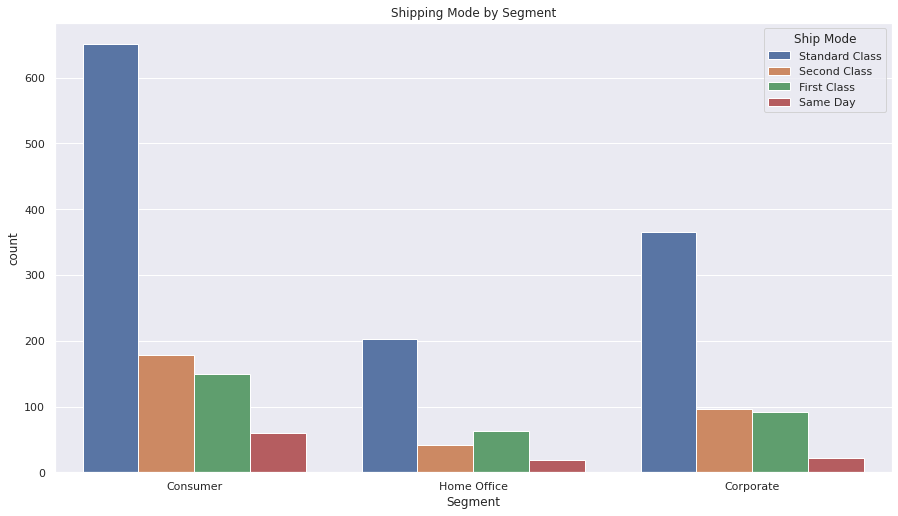

In [17]:
sns.countplot(x='Segment', hue='Ship Mode',data=data_loss)
plt.title('Shipping Mode by Segment')
plt.show()

From the following graph, we can see that the consumer segment who opted for same day delivery caused the most loss, but given the large variation shown by the line, this was probably a one-off.

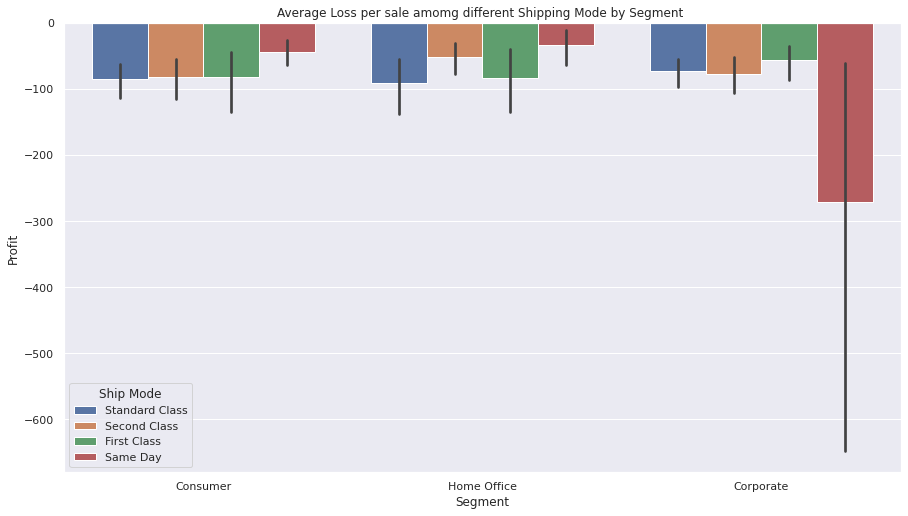

In [18]:
sns.barplot(data=data_loss, x='Segment',y='Profit', hue='Ship Mode')
plt.title('Average Loss per sale amomg different Shipping Mode by Segment ')
plt.show()

Identifying losses by each Sub-Category shows that selling of Bookcases, Tables, Appliances and Machinery causes at discounts causes huge loss to the supermarket chain.

In [19]:
data_loss[data_loss['Discount'] >0].groupby(['Category','Sub-Category'])['Profit'].sum()

Category         Sub-Category
Furniture        Bookcases      -12152.2060
                 Chairs          -9880.8413
                 Furnishings     -6490.9134
                 Tables         -32412.1483
Office Supplies  Appliances      -8629.6412
                 Binders        -38510.4964
                 Fasteners         -33.1952
                 Storage         -6426.3038
                 Supplies        -3015.6219
Technology       Accessories      -930.6265
                 Machines       -30118.6682
                 Phones          -7530.6235
Name: Profit, dtype: float64

In [20]:
data_loss[data_loss['Discount'] >0].groupby(['Category','Sub-Category'])['Profit'].mean()

Category         Sub-Category
Furniture        Bookcases      -109.479333
                 Chairs          -38.748397
                 Furnishings     -36.880190
                 Tables         -158.108040
Office Supplies  Appliances     -128.800615
                 Binders         -62.822996
                 Fasteners        -2.766267
                 Storage         -39.668542
                 Supplies        -91.382482
Technology       Accessories     -10.115505
                 Machines       -684.515186
                 Phones          -55.372232
Name: Profit, dtype: float64

Visualizing the relation among categories, their loss, and overall profit

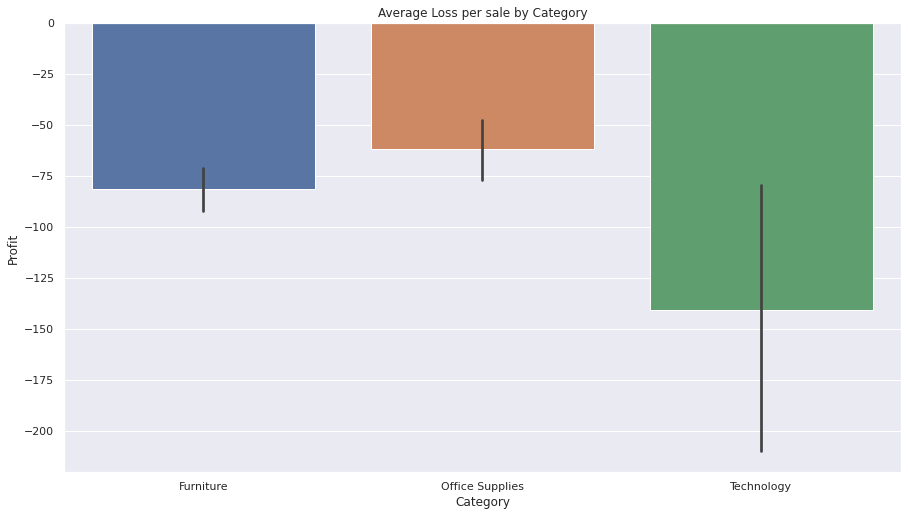

In [21]:
sns.barplot(x='Category', y='Profit', data=data_loss)
plt.title('Average Loss per sale by Category')
plt.show()

A blunder of sale that cost the company nearly 7000$ loss. This probably the reason why the Machines sub category shows a huge loss in our analysis.

In [22]:
data[data['Profit']==min(data['Profit'])]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


Average discounts and loss of different sub categories that resulted in a loss.

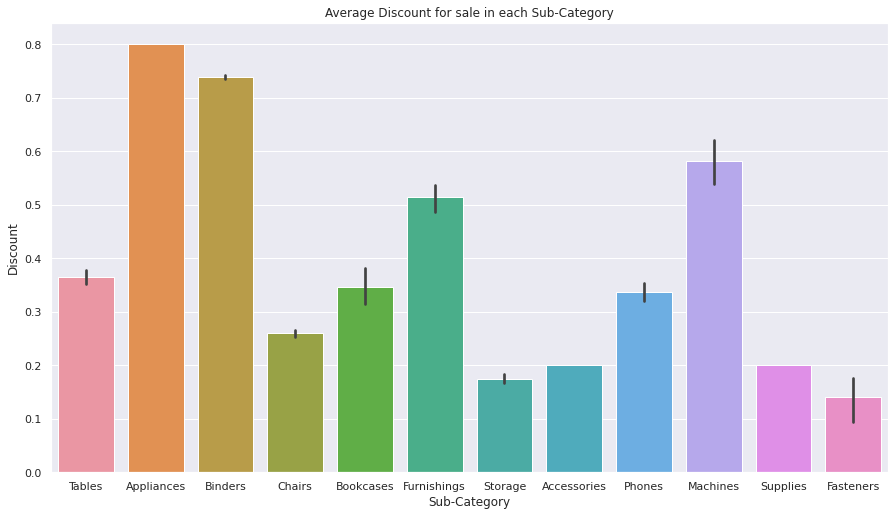

In [23]:
sns.barplot(x='Sub-Category', y='Discount', data=data_loss)
plt.title('Average Discount for sale in each Sub-Category')
plt.show()

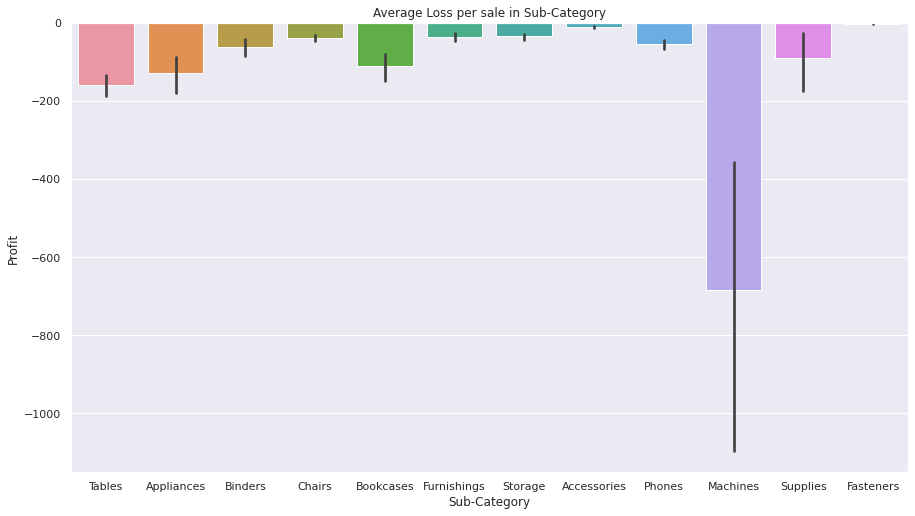

In [24]:
sns.barplot(x='Sub-Category', y='Profit', data=data_loss)
plt.title('Average Loss per sale in Sub-Category')
plt.show()

#Now, let's consider the impact of the location of the stores on profit

Finding the profit gained by the supermarket chain throughout different regions of the country. 

In [25]:
data.groupby('Region')['Profit'].sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

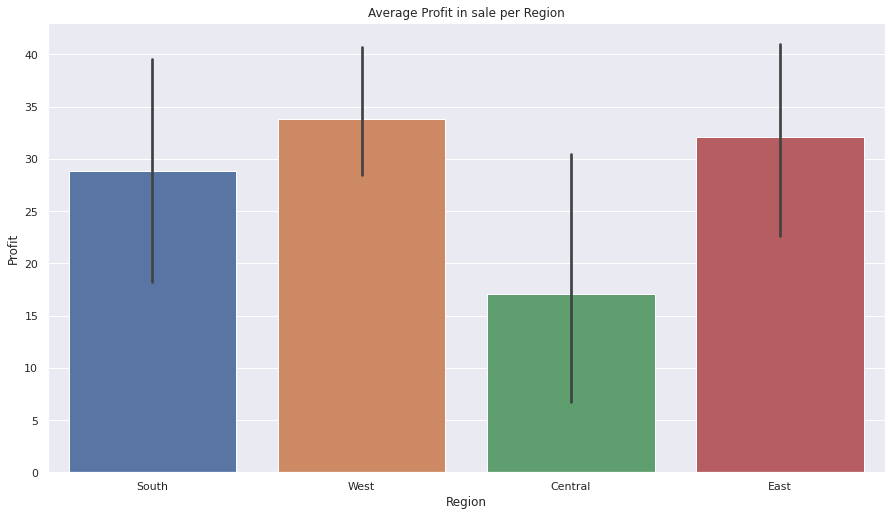

In [26]:
sns.barplot(x='Region', y='Profit', data=data)
plt.title('Average Profit in sale per Region')
plt.show()

The graph shows the average profit per sale in a region. Although all the regions show a positive profit margin, the central region of the country show a really small margin of profit per sale.

Analyzing the total profit provided by each city condensed into their respective regions, we can see quite some states  where the stores are really at a loss. Namely Illinois, Texas, Ohio, Pennsylvania, Florida, North Calorina, Arizona, Colorado, Oregon. 

In [27]:
data.groupby(['Region','State'])['Profit'].sum()

Region   State               
Central  Illinois               -12607.8870
         Indiana                 18382.9363
         Iowa                     1183.8119
         Kansas                    836.4435
         Michigan                24463.1876
         Minnesota               10823.1874
         Missouri                 6436.2105
         Nebraska                 2037.0942
         North Dakota              230.1497
         Oklahoma                 4853.9560
         South Dakota              394.8283
         Texas                  -25729.3563
         Wisconsin                8401.8004
East     Connecticut              3511.4918
         Delaware                 9977.3748
         District of Columbia     1059.5893
         Maine                     454.4862
         Maryland                 7031.1788
         Massachusetts            6785.5016
         New Hampshire            1706.5028
         New Jersey               9772.9138
         New York                74038.5486
  

Calculating the average profit per sale in the states, we can see almost the same states with negative profit margins. Namely Illinois, Texas, Ohio, Pennsylvania, Florida, North Calorina, Tennessee, Arizona, Colorado, Oregon. 

In [28]:
p_per_c = data.groupby(['Region','State'])['Profit'].mean()
p_per_c

Region   State               
Central  Illinois                -25.625787
         Indiana                 123.375411
         Iowa                     39.460397
         Kansas                   34.851813
         Michigan                 95.934069
         Minnesota               121.608847
         Missouri                 97.518341
         Nebraska                 53.607742
         North Dakota             32.878529
         Oklahoma                 73.544788
         South Dakota             32.902358
         Texas                   -26.121174
         Wisconsin                76.380004
East     Connecticut              42.823071
         Delaware                103.930988
         District of Columbia    105.958930
         Maine                    56.810775
         Maryland                 66.963608
         Massachusetts            50.262975
         New Hampshire            63.203807
         New Jersey               75.176260
         New York                 65.637011
  

In [29]:
city = pd.DataFrame(data_loss.groupby(['Region','State'])['City'].value_counts())
city.columns = ['Count']
city

Count
Region  State      City             
Central Illinois   Chicago       157
                   Aurora         21
                   Decatur         9
                   Peoria          7
                   Rockford        7
...                              ...
West    Oregon     Gresham         2
                   Hillsboro       2
                   Medford         1
        Washington Seattle        22
                   Des Moines      1

[256 rows x 1 columns]

Finding the cities where the most sales were recorded that resulted in a loss.

In [30]:
city['Count'].sort_values(ascending=False).head(20)

Region   State         City         
East     Pennsylvania  Philadelphia     254
Central  Texas         Houston          187
         Illinois      Chicago          157
         Texas         Dallas            73
East     Ohio          Columbus          51
         New York      New York City     47
West     California    Los Angeles       42
Central  Texas         San Antonio       34
West     Arizona       Phoenix           28
         California    San Francisco     28
South    Florida       Jacksonville      27
                       Miami             22
West     Washington    Seattle           22
Central  Illinois      Aurora            21
East     Ohio          Cleveland         21
                       Springfield       20
Central  Texas         Austin            19
                       Arlington         17
                       Huntsville        17
South    Florida       Tampa             16
Name: Count, dtype: int64

In [31]:
city['Loss'] = pd.Series(data_loss.groupby(['Region','State', 'City'])['Profit'].sum(), index=city.index)
city.head()

Count        Loss
Region  State    City                       
Central Illinois Chicago     157 -11120.6271
                 Aurora       21  -2359.8917
                 Decatur       9   -528.8800
                 Peoria        7    -72.7587
                 Rockford      7  -1383.9134

Cumulative loss per city in descending order.

In [32]:
city['Loss'].sort_values().head(20)

Region   State           City         
East     Pennsylvania    Philadelphia    -19590.7411
Central  Texas           Houston         -14785.3668
         Illinois        Chicago         -11120.6271
         Texas           San Antonio      -7831.0254
East     Ohio            Lancaster        -7378.6382
South    North Carolina  Burlington       -5999.3318
Central  Texas           Dallas           -4208.5218
East     New York        New York City    -3966.0226
West     Colorado        Louisville       -3694.1045
         Arizona         Phoenix          -3613.6298
South    Florida         Jacksonville     -3484.1650
East     Ohio            Newark           -3176.8002
Central  Illinois        Aurora           -2359.8917
East     Ohio            Columbus         -2017.8867
South    Florida         Miami            -1885.6832
         North Carolina  Concord          -1862.3124
East     Ohio            Springfield      -1778.2514
South    North Carolina  Charlotte        -1770.6737
       

Profit vs Discount shows that an increase in discount percentage also increases the loss suffered.

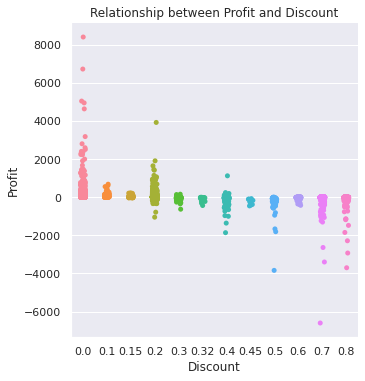

In [33]:
sns.catplot(y='Profit', x='Discount', data=data)
plt.title('Relationship between Profit and Discount')
plt.show()